# Natural Language Processing

## Exercise Sheet 1

In [2]:
#imports for all exercises
import nltk
from nltk.book import *
from nltk.draw.dispersion import dispersion_plot
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Exercise 1

How many words are there in `text2` from `nltk.book`? How many distinct words are there? Calculate the lexical diversity.


In [2]:
# wir interessieren uns nur fuer woerter, dh alles was nicht mit einem buchstaben 
# beginnt wird entfernt
word_filter = re.compile('^[A-Za-z].*')

# verleiche anzahl woerter mit gross und kleinschreibung
# mit alle woerter in Grossbuchstaben konvertiert. 
# es gibt verschiedene situationen in denen man ein wort gross oder klein
# schreiben kann. zum zaehlen der woerter halte ich es fuer sinnvoller hier
# die gross und kleinschreibung zu ignorieren und sich auf das wort zu konzentrieren 
filtered = [w for w in text2 if word_filter.match(w)]
filtered_upper = [w.upper() for w in text2 if word_filter.match(w)]
counts = Counter(filtered)
counts_upper = Counter(filtered_upper)

# anzahl woerter gesamt
total = sum(counts.values())
total_upper = sum(counts_upper.values())

print(total, total_upper)

120733 120733


In [3]:
# anzahl der unterschiedlichen woerter, mit gross und kleinschreibung
num_words = len(sorted( ((v,k) for k,v in counts.items()), reverse=True))
print(num_words)

6713


In [5]:
# anzahl der unterschiedlichen woerter, ohne gross und kleinschreibung
num_words_upper = len(sorted( ((v,k) for k,v in counts_upper.items()), reverse=True))
print(num_words_upper)

6283


In [6]:
# isgesamt gibt es durch die gross und kleinschreibung 
num_words - num_words_upper

430

In [ ]:
# woerter mehr

In [7]:
def lex_richness(count, total):
    return 100 * count / total

print(lex_richness(num_words, total), lex_richness(num_words_upper, total))

5.560203092774966 5.204045290020127


In [8]:
# zusatz: vergleiche auf unterschiede: haeufigsten woerter absteigend sortiert, mit gross und kleinschreibung
sorted( ((v,k) for k,v in counts.items()), reverse=True)[0:20]

[(4063, 'to'),
 (3861, 'the'),
 (3565, 'of'),
 (3350, 'and'),
 (2436, 'her'),
 (2043, 'a'),
 (2004, 'I'),
 (1904, 'in'),
 (1846, 'was'),
 (1568, 'it'),
 (1333, 'she'),
 (1305, 'be'),
 (1297, 'that'),
 (1234, 'for'),
 (1212, 'not'),
 (1179, 'as'),
 (1037, 'you'),
 (971, 'with'),
 (969, 'had'),
 (941, 'his')]

In [9]:
# zusatz: vergleiche auf unterschiede: haeufigsten woerter absteigend sortiert, ohne gross und kleinschreibung
sorted( ((v,k) for k,v in counts_upper.items()), reverse=True)[0:20]

[(4116, 'TO'),
 (4105, 'THE'),
 (3572, 'OF'),
 (3491, 'AND'),
 (2551, 'HER'),
 (2092, 'A'),
 (2004, 'I'),
 (1979, 'IN'),
 (1861, 'WAS'),
 (1757, 'IT'),
 (1613, 'SHE'),
 (1385, 'THAT'),
 (1305, 'BE'),
 (1262, 'FOR'),
 (1248, 'NOT'),
 (1221, 'AS'),
 (1191, 'YOU'),
 (1108, 'HE'),
 (1021, 'HIS'),
 (998, 'HAD')]

In [11]:
# zusatz: welche und wieviele woerter stellen 50% des gesamten textes

# sortiere woerter nach haeufigkeit 
s = sorted( ((v,k) for k,v in counts.items()), reverse=True)

# extrahiere die haeufigkeiten
s_values_sorted = np.array([num[0] for num in s])

# berechne die kummulierten relativen haeufigkeiten der woerter
rel_freq = np.cumsum(s_values_sorted) / np.sum(s_values_sorted)

# wir interessieren uns zB fuer die woerter die 50% des textes stellen
# speicher die indexe der selektierten woerter
ind = np.where(rel_freq < 0.5)
print(np.max(ind))

# transformiere in einen array zur leichteren extrahierung
s_arr = np.array(s)

# extrahiere die woerter die 50% des textes ausmachen
s_arr[np.where(rel_freq < 0.5),1]

64


array([['to', 'the', 'of', 'and', 'her', 'a', 'I', 'in', 'was', 'it',
        'she', 'be', 'that', 'for', 'not', 'as', 'you', 'with', 'had',
        'his', 'he', 'have', 'at', 'by', 'is', 's', 'Elinor', 'on',
        'all', 'him', 'so', 'but', 'which', 'could', 'Marianne', 'my',
        'Mrs', 'from', 'would', 'very', 'no', 'their', 'them', 'been',
        'were', 'me', 'they', 'more', 'said', 'any', 'what', 'this',
        'every', 'than', 'will', 'or', 'your', 'an', 'such', 'one', 'do',
        'But', 'much', 'sister', 'only']], dtype='<U21')

In [12]:
# dh es machen isgesamt
np.max(ind) / np.sum(np.array(s_arr[:,0], dtype = int))

0.000530095334332784

In [ ]:
# prozent der woerter insgesamt 50% vom text aus.

In [13]:
# zusatz: welche und wieviele woerter stellen 50% des gesamten textes

# sortiere woerter nach haeufigkeit 
s_upper = sorted( ((v,k) for k,v in counts_upper.items()), reverse=True)

# extrahiere die haeufigkeiten
s_upper_values_sorted = np.array([num[0] for num in s_upper])

# berechne die kummulierten relativen haeufigkeiten der woerter
rel_freq_upper = np.cumsum(s_upper_values_sorted) / np.sum(s_upper_values_sorted)

# wir interessieren uns zB fuer die woerter die 50% des textes stellen
# speicher die indexe der selektierten woerter
ind_upper = np.where(rel_freq_upper < 0.5)
print(np.max(ind_upper))

# transformiere in einen array zur leichteren extrahierung
s_arr_upper = np.array(s_upper)

# extrahiere die woerter die 50% des textes ausmachen
s_arr_upper[np.where(rel_freq_upper < 0.5),1]

55


array([['TO', 'THE', 'OF', 'AND', 'HER', 'A', 'I', 'IN', 'WAS', 'IT',
        'SHE', 'THAT', 'BE', 'FOR', 'NOT', 'AS', 'YOU', 'HE', 'HIS',
        'HAD', 'WITH', 'BUT', 'AT', 'HAVE', 'IS', 'BY', 'S', 'ON',
        'ELINOR', 'ALL', 'SO', 'HIM', 'MY', 'WHICH', 'COULD', 'NO',
        'MARIANNE', 'FROM', 'MRS', 'THEY', 'WOULD', 'VERY', 'THEIR',
        'THEM', 'WHAT', 'ME', 'WERE', 'BEEN', 'THIS', 'MORE', 'SAID',
        'ANY', 'YOUR', 'EVERY', 'WILL', 'THAN']], dtype='<U21')

In [14]:
np.max(ind) / np.sum(np.array(s_arr[:,0], dtype = int))

0.000530095334332784

In [ ]:
# der vergleich zwichen gross und kleinschreibung zeigt, dass durch ignorieren der gross und kleinschreibung 55 woerter 50% des textes stellen, im vergleich zu 64 bei unterscheidung der gross und kleinschreibung.

In [15]:
# alternativ, gleich wie zusatz 
FreqDist(counts)

FreqDist({'to': 4063, 'the': 3861, 'of': 3565, 'and': 3350, 'her': 2436, 'a': 2043, 'I': 2004, 'in': 1904, 'was': 1846, 'it': 1568, ...})

### Exercise 2

Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples?

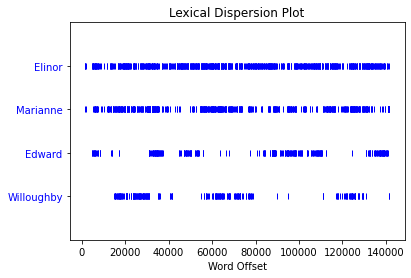

In [16]:
# dispersion plot
text2.dispersion_plot(["Elinor", "Marianne", "Edward", "Willoughby"])

It appears that the two femals are being named more often. Concerning the men, it appears that they do not tend to be named together.

### Exercise 3

Find the collocations in `text6`.

In [4]:
text6.collocation_list()

['BLACK KNIGHT',
 'clop clop',
 'HEAD KNIGHT',
 'mumble mumble',
 'Holy Grail',
 'squeak squeak',
 'FRENCH GUARD',
 'saw saw',
 'Sir Robin',
 'Run away',
 'CARTOON CHARACTER',
 'King Arthur',
 'Iesu domine',
 'Pie Iesu',
 'DEAD PERSON',
 'Round Table',
 'clap clap',
 'OLD MAN',
 'dramatic chord',
 'dona eis']

### Exercise 4

Use only the `index()` function to find all the indexes of the word "sunset" in `text9`.

In [7]:
indices = [i for i, x in enumerate(text9) if x == "sunset"]
indices

[629,
 642,
 1432,
 1650,
 13335,
 13381,
 16313,
 27014,
 49340,
 52092,
 60857,
 60862,
 64721,
 64736]

### Exercise 5

What is the difference between the following two lines? Calculate the two values:

    len(sorted(set(w.lower() for w in text1)))
    len(sorted(w.lower() for w in set(text1)))

In [12]:
len(sorted(set(w.lower() for w in text1)))

17231

In [13]:
len(sorted(w.lower() for w in set(text1)))

19317

The difference between the two lines is that the first line does not count multiple occurences of the same word, whereas the second line does.

### Exercise 6

Write the slice expression that extracts the last two words of `text2`.

In [16]:
text2[len(text2)-2:len(text2)]

['THE', 'END']

### Exercise 7

Find all the four-letter words in `text6`. With the help of a frequency distribution (`FreqDist`), show these words in decreasing order of frequency.


In [73]:
# frequency distribution of text6
fdist = FreqDist(text6)

# all four letter words
four_letter_words = [w for w in fdist if len(w) == 4 and w.isalpha()]

# sort by how often the words occur
sorted([(w, fdist[w]) for w in four_letter_words], key = lambda item: item[1], reverse  = True)

[('that', 84),
 ('your', 75),
 ('What', 65),
 ('this', 59),
 ('Well', 54),
 ('HEAD', 54),
 ('have', 53),
 ('boom', 45),
 ('clop', 39),
 ('with', 38),
 ('away', 38),
 ('here', 34),
 ('Burn', 32),
 ('King', 27),
 ('what', 27),
 ('Come', 26),
 ('just', 25),
 ('tell', 24),
 ('Look', 24),
 ('Holy', 24),
 ('must', 23),
 ('will', 22),
 ('That', 22),
 ('dead', 22),
 ('from', 20),
 ('they', 18),
 ('come', 18),
 ('very', 17),
 ('know', 17),
 ('name', 17),
 ('were', 16),
 ('Stop', 16),
 ('then', 15),
 ('like', 15),
 ('into', 15),
 ('clap', 15),
 ('ZOOT', 14),
 ('them', 13),
 ('CART', 13),
 ('want', 13),
 ('more', 13),
 ('when', 12),
 ('Shut', 12),
 ('make', 12),
 ('sure', 12),
 ('land', 11),
 ('mean', 11),
 ('take', 11),
 ('much', 11),
 ('didn', 11),
 ('find', 11),
 ('good', 11),
 ('time', 11),
 ('room', 11),
 ('seek', 10),
 ('back', 10),
 ('rewr', 10),
 ('king', 10),
 ('Just', 10),
 ('Iesu', 10),
 ('LEFT', 10),
 ('only', 9),
 ('Lord', 9),
 ('thou', 9),
 ('Zoot', 9),
 ('Hold', 9),
 ('They', 8),
 

### Exercise 8

Create a set for the words in `text6`. Use a `for` and an `if` statement to loop over the words in the set and print all titlecased words with more than one character, one per line.


In [5]:
# create set of words
words = set(text6)

# for every word in words
# if the lenth of the word is > 1 and the first letter of the word is uppercase
# then print the word
for w in words:
    if len(w) > 1 and w[0].isupper():
        print(w)


Arthur
Ives
Yapping
FRENCH
Iesu
Three
FATHER
At
Thou
Fiends
Hey
Princess
CHARACTERS
Sorry
CARTOON
Assyria
PATSY
BORS
Far
Riiight
Welcome
Bridge
VILLAGER
Huyah
Good
Shall
Eee
Brave
She
None
GIRLS
Midget
Thppt
Winston
You
Hiyya
Look
In
Huy
Surely
Alright
Beyond
Stay
Fine
Hiyaah
MAYNARD
WOMAN
Hya
SHRUBBER
Hoa
Back
ARTHUR
Be
France
Quoi
CRASH
Grail
It
Hoo
Actually
Every
Ay
Never
Until
Aauuuves
Where
MIDDLE
Try
Frank
Oooooooh
Uh
Robinson
Amen
Twenty
Use
Huh
HERBERT
Mud
Ewing
This
Get
Leaving
GUARDS
Winter
Eh
Seek
Whoa
Arimathea
Aauuugh
Yeah
CRAPPER
Cider
Between
Alice
Like
Maynard
Hah
England
Aaah
Forgive
DIRECTOR
Quiet
Very
Ridden
Chicken
Schools
Chickennn
Morning
Zoot
May
MIDGET
Silence
Gorge
Oui
Aagh
More
Thpppppt
Bread
There
Table
Great
LEFT
African
Old
Speak
Quick
Victory
Could
Hmm
Have
Herbert
Castle
Thsss
Aauuuuugh
Peng
Thy
Shrubberies
Unfortunately
Hiyah
Supreme
PRINCE
Keep
Shrubber
Augh
Throw
SUN
Aaaah
Behold
Bedwere
SIR
Ector
Camelot
Shut
Gawain
Apples
Too
Bristol
Aauuggghhh
Expla

### Exercise 9

Write expressions for finding all words in `text6` that meet the conditions listed below:

a) ending in "ing", 

b) containing the letter "z",

c) containing the letter sequence "pt".


In [10]:
# a ends with ing
for w in words:
    match = re.match(".*ing$", w)
    if match:
        print(match.group())

dictating
Yapping
making
bitching
resting
repressing
yelling
going
learning
wetting
groveling
depressing
setting
training
opening
herring
Ewing
Leaving
string
living
being
dying
smashing
telling
exploiting
bathing
boing
Morning
working
kneeling
undressing
sneaking
crying
daring
having
suggesting
preserving
writing
wounding
dancing
acting
guiding
coming
enjoying
carving
taunting
walking
marrying
exciting
fooling
getting
nothing
dragging
carrying
riding
Nothing
counting
rejoicing
Packing
everything
blessing
shivering
taking
throwing
laughing
bringing
starling
Running
doing
excepting
advancing
lying
understanding
pissing
binding
Everything
using
meeting
saying
distributing
bring
anging
warning
sing
running
king
spanking
buggering
appearing
something
approaching
Spring
chanting
anything
packing
signifying
singing
King
whispering
dressing
looking
Supposing
Bring
thing
averting
passing
chickening
entering
perpetuating
wedding
asking
shimmering


In [12]:
# b contains z
for w in words:
    match = re.match(".*z.*", w)
    if match:
        print(match.group())

amazes
Fetchez
zoosh
zone
frozen
zoo
zhiv
zoop


In [13]:
# c) containing the letter sequence "pt".
for w in words:
    match = re.match(".*pt.*", w)
    if match:
        print(match.group())

Thppt
Thpppppt
Chapter
Thppppt
Thpppt
excepting
temptress
temptation
empty
aptly
ptoo


### Exercise 10

Define `sent` to be the list of words `['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']`. Now write code to perform the following tasks:

a) print all words beginning with "sh",

b) print all words longer than four characters.

In [15]:
sent = ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']
# a: print all words beginnig with "sh"
for word in sent:
    match = re.match("^sh", word)
    if match:
        print(word)

she
shells
shore


In [16]:
for word in sent:
    if len(word) > 4:
        print(word)

sells
shells
shore


### Exercise 11

What does the following Python code do? 

`sum(len(w) for w in text1)`

Can you use it to work out the average word length of `text1`?

The code counts the number of symbols in the text. Yes, it can be used to calculate the average word length by deviding the given code by the number of words in the text.


In [23]:
total_num_words = sum(FreqDist(text1).values())
sum(len(w) for w in text1) / total_num_words

3.830411128023649

Text1 has an average word length of 3.8.

### Exercise 12

Define a function `freq(word, text)` that calculates how often a given word occurs in a text, not using `count()` but a `FreqDist`. Use the function to calculate how often "promise" appears in `text4`.

In [55]:
def freq(word, text):
    return FreqDist(text)[word]

In [57]:
freq("the", text1)

13721